# 1.1 Movielens full EDA

a) Gör en EDA för att förstå datasetet. Inkludera olika slags plots. Begränsa dig inte till frågorna nedan,
utan försök undersöka fler aspekter av datan

In [9]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import NearestNeighbors


df_movies = pd.read_csv("../data/ml-latest/movies.csv") #här är index ingen feature
df_ratings = pd.read_csv("../data/ml-latest/ratings.csv")
#df_scores = pd.read_csv("../data/ml-latest/genome-scores.csv")
#df_tags = pd.read_csv("../data/ml-latest/genome-tags.csv")

df_movies

,movieId,title,genres
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy
1,2,Jumanji (1995),Adventure|Children|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama
86533,288971,Ouija Japan (2021),Action|Horror
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller


In [10]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [11]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [12]:
df_ratings.head()

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119


# Kollar igenom datasetet

In [13]:
df_movies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 86537 entries, 0 to 86536
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   movieId  86537 non-null  int64 
 1   title    86537 non-null  object
 2   genres   86537 non-null  object
dtypes: int64(1), object(2)
memory usage: 2.0+ MB


In [14]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [15]:
df_movies.isna()

,movieId,title,genres
0,False,False,False
1,False,False,False
2,False,False,False
3,False,False,False
4,False,False,False
...,...,...,...
86532,False,False,False
86533,False,False,False
86534,False,False,False
86535,False,False,False


In [16]:
df_ratings.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


# Börjar Plotta


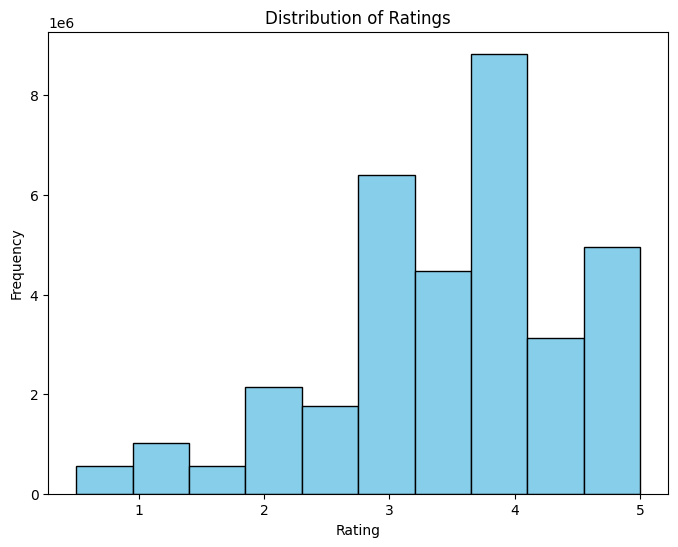

In [17]:
plt.figure(figsize=(8, 6))
plt.hist(df_ratings['rating'], bins=10, color='skyblue', edgecolor='black')
plt.title('Distribution of Ratings')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

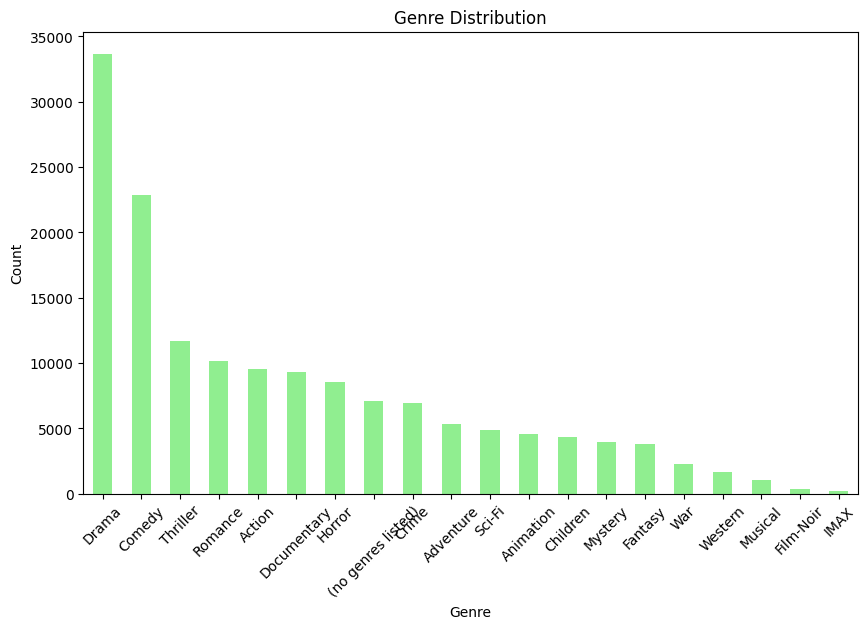

In [18]:
plt.figure(figsize=(10, 6))
genre_counts = df_movies['genres'].str.split('|', expand=True).stack().value_counts()
genre_counts.plot(kind='bar', color='lightgreen')
plt.title('Genre Distribution')
plt.xlabel('Genre')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()

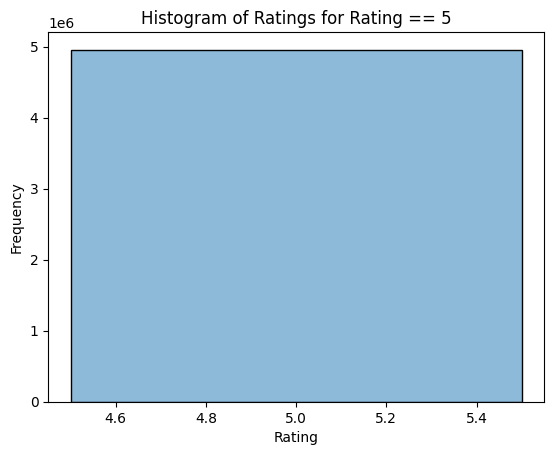

In [19]:
sns.histplot(df_ratings.query("rating ==5" ), x="rating", kde=True)
plt.title('Histogram of Ratings for Rating == 5')
plt.xlabel('Rating')
plt.ylabel('Frequency')
plt.show()

b) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [20]:
movie_rating_counts = df_ratings['movieId'].value_counts().reset_index()
movie_rating_counts.columns = ['movieId', 'rating_count']

# Sortera filmerna efter antalet betyg och välj de 10 filmer med flest betyg
top_10_movies = movie_rating_counts.nlargest(10, 'rating_count')

# Visa de 10 filmerna med mest betyg
top_10_movies_with_titles = pd.merge(top_10_movies, df_movies[['movieId', 'title']], on='movieId')
print(top_10_movies_with_titles)

   movieId  rating_count                                              title
0      318        122296                   Shawshank Redemption, The (1994)
1      356        113581                                Forrest Gump (1994)
2      296        108756                                Pulp Fiction (1994)
3     2571        107056                                 Matrix, The (1999)
4      593        101802                   Silence of the Lambs, The (1991)
5      260         97202          Star Wars: Episode IV - A New Hope (1977)
6     2959         86207                                  Fight Club (1999)
7      527         84232                            Schindler's List (1993)
8      480         83026                               Jurassic Park (1993)
9     1196         80200  Star Wars: Episode V - The Empire Strikes Back...


c) Beräkna den genomsnittliga ratingen för dessa 10 filmerna med flest ratings.


In [21]:
avarage_rating = df_ratings["rating"].mean()
round_avarage_rating = round(avarage_rating)
print("Det genomsnittliga betyget är:", round_avarage_rating)

Det genomsnittliga betyget är: 4


In [22]:
df_movies.isnull().count()

movieId    86537
title      86537
genres     86537
dtype: int64

d) Gör en plot över årtal och antalet filmer representerade i datasetet

In [23]:

df_movies['year'] = df_movies['title'].str.extract(r'\((\d{4})\)$') #regular expression
df_movies = df_movies.dropna()

df_movies["year"] = df_movies["year"].astype("int64") #convert object too int64





C:\Users\dessa\AppData\Local\Temp\ipykernel_4136\4043090361.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_movies["year"] = df_movies["year"].astype("int64") #convert object too int64


In [24]:
df_count = df_movies.groupby("year").count()["movieId"].reset_index() #grupperar filmerna by year




<Axes: xlabel='year', ylabel='number_movies'>

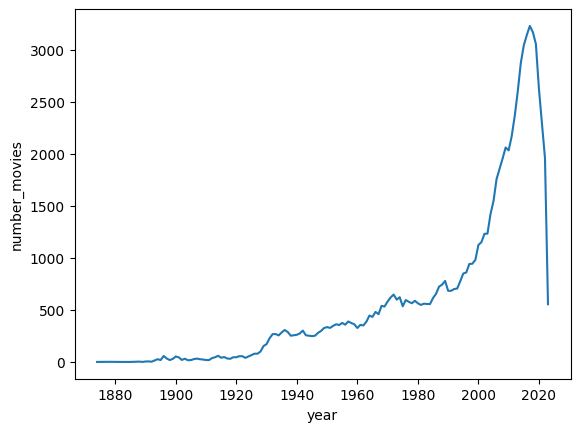

In [25]:
df_count = df_count.rename({"movieId": "number_movies"}, axis=1) #byter namn på movieid till number movies

sns.lineplot(df_count, x ="year", y = "number_movies") #plottar 

e) Gör en plot över antalet ratings mot movieId.

In [26]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [27]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [28]:
# genre = "Fantasy"
# genre_movies = df_movies[df_movies['genres'].str.contains(genre)]

# # Merge df_ratings with genre_movies to get ratings for movies in the specified genre
# merged_df = pd.merge(df_ratings, genre_movies, on='movieId', how='inner')


# rating_count_per_movie = df_ratings["movieId"].value_counts()
# plt.figure(figsize=(10, 6))
# sns.barplot(x=rating_count_per_movie.index, y=rating_count_per_movie.values, color="skyblue")
# plt.xlabel('Rating')
# plt.ylabel('Frequency')
# plt.show()

# #rating_count_per_movie.values

f) Beräkna genomsnittliga ratings för de top 10 filmerna med flest ratings. Gör ett stapeldiagram över
dessa

In [29]:
# # Get the movie titles corresponding to the top 10 movies
# top_10_movie_titles = df_movies.set_index('movieId').loc[top_10_movies.index]['title']

# # Print the top 10 movies with their mean ratings
# for movie_id, mean_rating in top_10_movies.items():
#     title = top_10_movie_titles[movie_id]
#     print(f"{title}: {mean_rating:.2f}")



# 1.2 Skapa gles matris
Likt i videon i uppgift 1.0 skapade du en pivottabell av dataframet med index: "movieId", columns: "userId"
och values: "ratings". Denna pivottabell är dock "dyr" att skapa och förmodligen kommer inte din dator att
klara av skapa den om du inte filtrerar bort viss data. Fundera ut ett lämpligt sätt att filtrera ditt dataset,
pröva dig fram och motivera.
Skapa en gles (sparse) matris av denna pivottabell mha scipy.sparse.csc_matrix(). Vill du använda
dig av all data går det också att lösa, men du behöver lösa hur du skapar den glesa matrisen utan pandas
pivot-tabell.



In [30]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 4 columns):
 #   Column     Dtype  
---  ------     -----  
 0   userId     int64  
 1   movieId    int64  
 2   rating     float64
 3   timestamp  int64  
dtypes: float64(1), int64(3)
memory usage: 1.0 GB


In [31]:
df_ratings

,userId,movieId,rating,timestamp
0,1,1,4.0,1225734739
1,1,110,4.0,1225865086
2,1,158,4.0,1225733503
3,1,260,4.5,1225735204
4,1,356,5.0,1225735119
...,...,...,...,...
33832157,330975,8340,2.0,1091583256
33832158,330975,8493,2.5,1091585709
33832159,330975,8622,4.0,1091581777
33832160,330975,8665,3.0,1091581765


In [32]:
from scipy.sparse import csr_matrix
df_ratings.drop(['timestamp'], axis=1, inplace=True) # använd csr inte csc till matris


df_ratings_reset_index = df_ratings.reset_index(drop=True)

# movies_users = df_ratings_reset_index.pivot(index="movieId", columns="userId", values="rating").fillna(0)
# movies_users

In [33]:
df_movies

,movieId,title,genres,year
0,1,Toy Story (1995),Adventure|Animation|Children|Comedy|Fantasy,1995
1,2,Jumanji (1995),Adventure|Children|Fantasy,1995
2,3,Grumpier Old Men (1995),Comedy|Romance,1995
3,4,Waiting to Exhale (1995),Comedy|Drama|Romance,1995
4,5,Father of the Bride Part II (1995),Comedy,1995
...,...,...,...,...
86532,288967,State of Siege: Temple Attack (2021),Action|Drama,2021
86533,288971,Ouija Japan (2021),Action|Horror,2021
86534,288975,The Men Who Made the Movies: Howard Hawks (1973),Documentary,1973
86535,288977,Skinford: Death Sentence (2023),Crime|Thriller,2023


# drop movies with ratings less then 3.5 för att misnaka datasetet

In [34]:
df_ratings

,userId,movieId,rating
0,1,1,4.0
1,1,110,4.0
2,1,158,4.0
3,1,260,4.5
4,1,356,5.0
...,...,...,...
33832157,330975,8340,2.0
33832158,330975,8493,2.5
33832159,330975,8622,4.0
33832160,330975,8665,3.0


In [35]:
df_ratings.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33832162 entries, 0 to 33832161
Data columns (total 3 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int64  
 1   movieId  int64  
 2   rating   float64
dtypes: float64(1), int64(2)
memory usage: 774.4 MB


# Lägger till Yearkolumnen till DF_ratings för att sedan kunna filtera bort ratings & specifika årtal samtidigt

In [36]:
df_ratings_year = pd.merge(df_ratings, df_movies[["movieId", "year", "title"]], on="movieId", how="left")
df_ratings_year

,userId,movieId,rating,year,title
0,1,1,4.0,1995.0,Toy Story (1995)
1,1,110,4.0,1995.0,Braveheart (1995)
2,1,158,4.0,1995.0,Casper (1995)
3,1,260,4.5,1977.0,Star Wars: Episode IV - A New Hope (1977)
4,1,356,5.0,1994.0,Forrest Gump (1994)
...,...,...,...,...,...
33832157,330975,8340,2.0,1979.0,Escape from Alcatraz (1979)
33832158,330975,8493,2.5,1990.0,Memphis Belle (1990)
33832159,330975,8622,4.0,2004.0,Fahrenheit 9/11 (2004)
33832160,330975,8665,3.0,2004.0,"Bourne Supremacy, The (2004)"


In [63]:

#df_rating_filtered = df_ratings_year[(df_ratings_year["rating"]>=3.5) &(df_ratings_year["year"] > 2020)]

#print(df_rating_filtered)

df_rating_filtered = df_ratings_year[(df_ratings_year['rating'] >= 3.5) & (df_ratings_year['year'] > 1980)]

# Step 3: Filter movies with a rating amount of 1000 or more users
movie_rating_counts = df_rating_filtered['movieId'].value_counts()
movies_to_keep = movie_rating_counts[movie_rating_counts >= 30000].index
df_filtered = df_rating_filtered[df_rating_filtered['movieId'].isin(movies_to_keep)]

# Display the resulting DataFrame
df_rating_filtered



,userId,movieId,rating,year,title
0,1,1,4.0,1995.0,Toy Story (1995)
1,1,110,4.0,1995.0,Braveheart (1995)
2,1,158,4.0,1995.0,Casper (1995)
4,1,356,5.0,1994.0,Forrest Gump (1994)
5,1,381,3.5,1994.0,When a Man Loves a Woman (1994)
...,...,...,...,...,...
33832151,330975,7018,4.0,1990.0,Presumed Innocent (1990)
33832153,330975,7139,4.0,2002.0,In America (2002)
33832154,330975,7151,4.0,2003.0,Girl with a Pearl Earring (2003)
33832155,330975,7153,4.0,2003.0,"Lord of the Rings: The Return of the King, The..."


# Skapar Pivot tabel ( sparse matrix)

In [64]:
df_rating_filtered = df_rating_filtered.drop("year", axis=1)

In [65]:
import numpy as np
df_rating_filtered = df_rating_filtered.astype({"userId":np.int32, "movieId": np.int32, "rating": np.float32})

In [66]:
df_rating_filtered.reset_index(drop=True)["movieId"]

0              1
1            110
2            158
3            356
4            381
            ... 
18320410    7018
18320411    7139
18320412    7151
18320413    7153
18320414    8622
Name: movieId, Length: 18320415, dtype: int32

In [67]:
df_rating_filtered.info()

<class 'pandas.core.frame.DataFrame'>
Index: 18320415 entries, 0 to 33832159
Data columns (total 4 columns):
 #   Column   Dtype  
---  ------   -----  
 0   userId   int32  
 1   movieId  int32  
 2   rating   float32
 3   title    object 
dtypes: float32(1), int32(2), object(1)
memory usage: 489.2+ MB


In [69]:

pivot_table = df_rating_filtered.pivot(index='movieId', columns='userId', values='rating').fillna(0) #drop=True 

sparse_matrix = csr_matrix(pivot_table.values)


print(sparse_matrix)

ValueError: negative dimensions are not allowed

# 1.3 Recommender system
Skapa ett recommender system med KNN och låt systemet ta input från användaren och skriva ut top 5
rekommenderade filmerna, baserat på användarens sökquery. Observera att det finns ett logiskt fel i
videon som gör att rekommendationerna inte blir så bra, försök hitta felet och åtgärda det.
  a) Beskriv med ord hur ditt system fungerar.
  b) Leta online och läs vidare om rekommenderarsystem och beskriv kort hur dem fungerar. Glöm inte
källhänvisa